In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
import warnings
warnings.filterwarnings('ignore')

In [214]:
#
test = pd.read_csv('data/cpi/월별_소비자물가_등락률_20221220113618.csv', encoding='cp949')
test

,지수종류(1),2000.01,2000.02,2000.03,2000.04,2000.05,2000.06,2000.07,2000.08,2000.09,...,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,지수종류(1),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),...,전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%),전월비 (%)
1,신선식품지수,4.0,2.0,-0.8,-4.1,-6.8,-0.8,2.5,1.5,14.8,...,-0.1,-2.0,0.2,-2.0,-1.0,6.9,5.4,2.8,-6.1,-8.0


In [215]:
# 배추 가격과 일자만 있는 데이터
test2 = pd.read_csv('data/price/price_baechoo.csv')
test2

,구분,평균
0,2000-01-03,5600.0
1,2000-01-04,5600.0
2,2000-01-05,5620.0
3,2000-01-06,5700.0
4,2000-01-07,5670.0
...,...,...
5890,2022-12-14,5430.5
5891,2022-12-15,5430.5
5892,2022-12-16,5304.0
5893,2022-12-19,5459.5


In [256]:
# 모든 데이터를 합친 데이터(정리된 데이터)
data = pd.read_csv('data/merge_all/merge_all.csv')

In [217]:
# data 에서 거래년월

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   전월비(%)          8370 non-null   float64
 3   평균              8370 non-null   float64
 4   거래량             8370 non-null   float64
dtypes: float64(4), object(1)
memory usage: 327.1+ KB


In [219]:
# 데이터 나누기
X = data[['자동차용 경유 가격 (원)', '전월비(%)', '거래량']]
y = data['평균']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    


In [220]:
# 데이터 정규화 하기
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test = scaler.transform(y_test.values.reshape(-1,1))

In [221]:
X_train

array([[ 1.73020078,  0.60845508, -0.62240597],
       [-1.71471051, -0.29130583, -0.51140789],
       [ 0.47248127, -0.29130583,  0.59930809],
       ...,
       [ 0.82186893, -1.19106674, -0.09142102],
       [-1.63340954,  0.37373484, -0.28280987],
       [ 0.26634852, -1.28886684,  2.64567209]])

In [222]:
X_test

array([[-0.34009368,  0.530215  ,  0.21788251],
       [ 0.42509193,  1.7233762 , -0.26396104],
       [ 1.11509045, -0.89766645,  1.48726752],
       ...,
       [ 0.60166069, -0.97590652,  0.18021003],
       [ 0.26634852, -1.28886684,  0.31915402],
       [ 0.16586357,  0.3346148 , -0.3364205 ]])

In [223]:
# 모델 만들기
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [224]:
# 예측
y_pred = model.predict(X_test)
        
# 평가
#print('MSE :', mean_squared_error(y_test, y_pred))
#print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))
#print('MAE :', mean_absolute_error(y_test, y_pred))
print('R2 :', r2_score(y_test, y_pred))
#print('MSLE :', mean_squared_log_error(y_test, y_pred))

R2 : 0.904123174345869


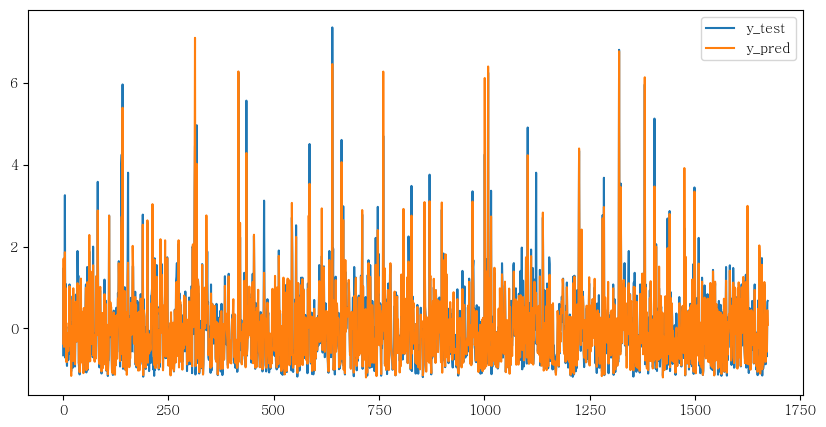

In [225]:
# 예측값과 실제값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.legend()
plt.show()

In [226]:
# data 로 LSTM 예측 모델 만들기


In [227]:
df = data
# scaler = MinMaxScaler()
# scale_cols = ['자동차용 경유 가격 (원)', '전월비(%)', '거래량']
# df_scaled = scaler.fit_transform(df[scale_cols])
# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   전월비(%)          8370 non-null   float64
 3   평균              8370 non-null   float64
 4   거래량             8370 non-null   float64
dtypes: float64(4), object(1)
memory usage: 327.1+ KB


In [228]:
df.isnull().sum()

거래년월일             0
자동차용 경유 가격 (원)    0
전월비(%)            0
평균                0
거래량               0
dtype: int64

In [229]:
#df2 거래년월일 Dtype 을 datetime 으로 변경
df['거래년월일'] = pd.to_datetime(df['거래년월일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   거래년월일           8370 non-null   datetime64[ns]
 1   자동차용 경유 가격 (원)  8370 non-null   float64       
 2   전월비(%)          8370 non-null   float64       
 3   평균              8370 non-null   float64       
 4   거래량             8370 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 327.1 KB


In [230]:
# df 에서 평균 컬럼만 iloc로 추출 (y값)
#df = df.iloc[:, 3:4].values
#df

# df 에서 평균 컬럼 제외하고 추출
#df2 = df.iloc[:, 0:3]
#df2

In [231]:
# df에서 거래년월, 평균 제거
# df = df.drop(['거래년월일', '평균'], axis=1, inplace=True)
# df

In [232]:
# X = df_scaled
# y = df['평균']

In [233]:
# x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
# x_train.shape, x_valid.shape

In [234]:
# 정규화 하는 코드
# def normalize_data(dataset):
#     cols = dataset.columns.tolist()
#     col_name = [0]*len(cols)
#     for i in range(len(cols)):
#         col_name[i] = i
#     dataset.columns = col_name
#     dtypes = dataset.dtypes.tolist()
#     minmax = list()
#     for column in dataset:
#         dataset = dataset.astype({column: 'float32'})
#     for i in range(len(cols)):
#         col_values = dataset[col_name[i]]
#         value_min = min(col_values)
#         value_max = max(col_values)
#         minmax.append([value_min, value_max])
#     for column in dataset:
#         values = dataset[column].values
#         for i in range(len(values)):
#             values[i] = (values[i] - minmax[column][0]) / (minmax[column][1] - minmax[column][0])
#         dataset[column] = values
#     dataset[column] = values
#     return dataset,minmax
    
# dataset,minmax = normalize_data(df)
# print(df.values)
# values = dataset.values

In [235]:
# 시퀀스를 데이터 세트로 변환 x 와 y 값 분리 하고 학습 
# def split_sequences(sequence, n_steps):
#     X, y = list(), list()
#     for i in range(len(sequence)):
#         end_ix = i + n_steps
#         if end_ix > len(sequence)-1:
#             break
#         seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
#         X.append(seq_x)
#         y.append(seq_y)
#     return np.array(X), np.array(y)
    
# def data_setup(n_steps, n_seq,sequence):
#     X, y = split_sequences(sequence, n_steps)
#     n_features = X.shape[2]
#     X = X.reshape((len(X),n_steps, n_features))
#     new_y = []
#     for term in y:
#         new_term = term[-1]
#         new_y.append(new_term)
#     return X, np.array(new_y), n_features
    
# n_steps = 10
# n_seq = 10000
# rel_test_len = 0.1
# X,y,n_features = data_setup(n_steps,n_seq,values)
# X = X[:-1]
# y = y[1:]
# X_test,y_test = X[:int(len(X)*rel_test_len)],y[:int(len(X)*rel_test_len)]
# X_train,y_train = X[int(len(X)*rel_test_len):],y[int(len(X)*rel_test_len):]
# X.shape

In [257]:
lstm_df = data
lstm_df

,거래년월일,자동차용 경유 가격 (원),전월비(%),평균,거래량
0,2000-01-01,583.35,4.0,5600.0,102285.0
1,2000-01-02,583.35,4.0,5600.0,102285.0
2,2000-01-03,583.35,4.0,5600.0,102285.0
3,2000-01-04,583.35,4.0,5600.0,715338.0
4,2000-01-05,583.35,4.0,5620.0,340568.0
...,...,...,...,...,...
8365,2022-11-26,1879.15,-8.0,6100.0,296250.0
8366,2022-11-27,1879.15,-8.0,6100.0,296250.0
8367,2022-11-28,1879.15,-8.0,5664.0,201478.0
8368,2022-11-29,1879.15,-8.0,5592.0,77130.0


In [258]:
#na 값 확인하기
#lstm_df.isna().sum()

In [259]:
# lstm_df 에서 전월비(%) 칼럼 제거
lstm_df = lstm_df.drop(['전월비(%)'], axis=1)
lstm_df

,거래년월일,자동차용 경유 가격 (원),평균,거래량
0,2000-01-01,583.35,5600.0,102285.0
1,2000-01-02,583.35,5600.0,102285.0
2,2000-01-03,583.35,5600.0,102285.0
3,2000-01-04,583.35,5600.0,715338.0
4,2000-01-05,583.35,5620.0,340568.0
...,...,...,...,...
8365,2022-11-26,1879.15,6100.0,296250.0
8366,2022-11-27,1879.15,6100.0,296250.0
8367,2022-11-28,1879.15,5664.0,201478.0
8368,2022-11-29,1879.15,5592.0,77130.0


In [260]:
lstm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8370 entries, 0 to 8369
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   거래년월일           8370 non-null   object 
 1   자동차용 경유 가격 (원)  8370 non-null   float64
 2   평균              8370 non-null   float64
 3   거래량             8370 non-null   float64
dtypes: float64(3), object(1)
memory usage: 261.7+ KB


In [261]:
# 정규화 작업(date 를 제외한 항목을 제외한 숫자로 표현되는 모든 column에 대해 0~1 값으로 정규화 작업을 수행)
scaler = MinMaxScaler()
scale_cols = ['자동차용 경유 가격 (원)', '평균', '거래량'] #정규화 대상 column 정의
scaled_df = scaler.fit_transform(lstm_df[scale_cols]) # 정규화 수행
print(type(scaled_df), '\n') # 리턴값 확인하면 numpy.ndarray임을 알 수 있음 -> 데이터프레임으로 변환해서 사용해야함

# 정규화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_df, columns=scale_cols) #정규화된 새로운 dataframe 생성
print(scaled_df)

<class 'numpy.ndarray'> 

      자동차용 경유 가격 (원)        평균       거래량
0           0.022324  0.106796  0.028243
1           0.022324  0.106796  0.028243
2           0.022324  0.106796  0.028243
3           0.022324  0.106796  0.197620
4           0.022324  0.107351  0.094077
...              ...       ...       ...
8365        0.863720  0.120666  0.081833
8366        0.863720  0.120666  0.081833
8367        0.863720  0.108571  0.055649
8368        0.863720  0.106574  0.021293
8369        0.863720  0.096865  0.033078

[8370 rows x 3 columns]


In [262]:
# 딥러닝 학습을 위한 입력데이터 feature column , 정답데이터 column 정의 후 numpy 로 변환하여 데이터 전처리 과정 완료하기
feature_cols = ['자동차용 경유 가격 (원)', '거래량', '평균'] #feature 정의(입력데이터)
label_cols = ['평균'] #label 정의(정답데이터)

feature_df = pd.DataFrame(scaled_df, columns=feature_cols)  #feature 데이터프레임 생성
label_df = pd.DataFrame(scaled_df, columns=label_cols) #label 데이터프레임 생성

print(feature_df)
print(label_df)

# 딥러닝 학습을 위해 dataframe 에서 numpy 로 변환
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

      자동차용 경유 가격 (원)       거래량
0           0.022324  0.028243
1           0.022324  0.028243
2           0.022324  0.028243
3           0.022324  0.197620
4           0.022324  0.094077
...              ...       ...
8365        0.863720  0.081833
8366        0.863720  0.081833
8367        0.863720  0.055649
8368        0.863720  0.021293
8369        0.863720  0.033078

[8370 rows x 2 columns]
            평균
0     0.106796
1     0.106796
2     0.106796
3     0.106796
4     0.107351
...        ...
8365  0.120666
8366  0.120666
8367  0.108571
8368  0.106574
8369  0.096865

[8370 rows x 1 columns]


In [263]:
# 입력 파라미터 feature, label => numpy type 함수로 만들기 
def make_sequene_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = [] # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size]) 
        #feature[i:i+window_size] => 2차원 배열, 슬라이싱 이용하여 [[..], [..],..] 형상으로 입력 데이터, feature를 생성함
        label_list.append(label[i+window_size]) # 2차원 행렬의 배열
    
    return np.array(feature_list), np.array(label_list)  # 3차원 배열로 리턴
    #feature_list = [ [..], [..], ..] 이므로 리턴값 np.array(feature_list)는 (batch_size, time steps, input dims형상을 가짐

In [264]:
# 학습데이터 X, Y 생성
window_size = 40 #앞에 40개 데이터를 이용해서 그 다음 정답데이터 label 를 예측한다는 뜻
X, Y = make_sequene_dataset(feature_np, label_np, window_size) #make_sequence_data 함수를 이용해서 X, Y 생성
print(X.shape, Y.shape)

(8330, 40, 2) (8330, 1)


In [265]:
split = -300 # 가장 최근 300개 데이터 가져와서 트레이닝 데이터, 테스트 데이터 분리

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(8030, 40, 2) (8030, 1)
(300, 40, 2) (300, 1)


In [266]:
model = Sequential()
model.add(LSTM(128, activation='tanh', #LSTM 레이어에서 tanh 를 활성화 함수로 가지는 노드 수 128개
               input_shape=x_train[0].shape)) #input_sape=(40, 2) 40개의 데이터를 2개씩 입력받음

model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 128)               67072     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


In [267]:
#모델 컴파일 및 학습
#조기종료 셋팅  : EarlyStopping
model.compile(loss='mse', optimizer='adam', metrics=['mae']) #metrics 관찰대상(mae = 평균절대오차값)
early_stop = EarlyStopping(monitor='val_loss', patience=10) #val_loss 가 5번 이상 개선되지 않으면 학습 중단
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=16, callbacks=[early_stop])

Epoch 1/100
502/502 [==============================] - 90s 139ms/step - loss: 0.0112 - mae: 0.0795 - val_loss: 0.0642 - val_mae: 0.1547
Epoch 2/100
502/502 [==============================] - 75s 149ms/step - loss: 0.0108 - mae: 0.0781 - val_loss: 0.0733 - val_mae: 0.1757
Epoch 3/100
502/502 [==============================] - 74s 148ms/step - loss: 0.0106 - mae: 0.0778 - val_loss: 0.0851 - val_mae: 0.2023
Epoch 4/100
502/502 [==============================] - 130s 259ms/step - loss: 0.0106 - mae: 0.0777 - val_loss: 0.0732 - val_mae: 0.1759
Epoch 5/100
502/502 [==============================] - 114s 226ms/step - loss: 0.0106 - mae: 0.0776 - val_loss: 0.0811 - val_mae: 0.1934
Epoch 6/100
502/502 [==============================] - 51s 102ms/step - loss: 0.0106 - mae: 0.0776 - val_loss: 0.0757 - val_mae: 0.1798
Epoch 7/100
254/502 [==============>...............] - ETA: 44s - loss: 0.0108 - mae: 0.0780

KeyboardInterrupt: 

In [ ]:
# # 배추 가격 12월 가져와서 예측하기 (전처리)
# pre_data = pd.read_csv('data/price/price_baechoo.csv')
# pre_data

,구분,평균
0,2000-01-03,5600.0
1,2000-01-04,5600.0
2,2000-01-05,5620.0
3,2000-01-06,5700.0
4,2000-01-07,5670.0
...,...,...
5890,2022-12-14,5430.5
5891,2022-12-15,5430.5
5892,2022-12-16,5304.0
5893,2022-12-19,5459.5


In [ ]:
# # pre_data 에서 2022-12-01 ~ 2022-12-31 까지의 데이터를 가져와서 예측하기
# pre_data = pre_data[pre_data['구분'] >= '2022-12-01' ]
# pre_data


,구분,평균
47,2029-02-01,7430.0
2252,2029-02-01,4110.0
3254,2029-02-01,6600.0
4219,2029-02-01,9400.0
5882,2022-12-01,5462.0
5883,2022-12-05,5982.0
5884,2022-12-06,5502.0
5885,2022-12-07,5488.0
5886,2022-12-08,5408.0
5887,2022-12-09,5408.0


In [ ]:
# # pre_data 에서 2029년도 데이터행 삭제
# pre_data = pre_data[pre_data['구분'] < '2029-01-01' ]
# pre_data

,구분,평균
5882,2022-12-01,5462.0
5883,2022-12-05,5982.0
5884,2022-12-06,5502.0
5885,2022-12-07,5488.0
5886,2022-12-08,5408.0
5887,2022-12-09,5408.0
5888,2022-12-12,5244.5
5889,2022-12-13,5245.5
5890,2022-12-14,5430.5
5891,2022-12-15,5430.5


In [ ]:
# 주가 예측
pred = model.predict(x_test) 

plt.figure(figsize=(12, 6))
plt.title('자동차용 경유 가격 (원), 거래량, window_size=40')
plt.ylabel('평균')
plt.xlabel('일자')
plt.plot(y_test, label='실제값')
plt.plot(pred, label='예측값')
plt.grid()
plt.legend(loc='best')

plt.show()

10/10 [==============================] - 4s 79ms/step


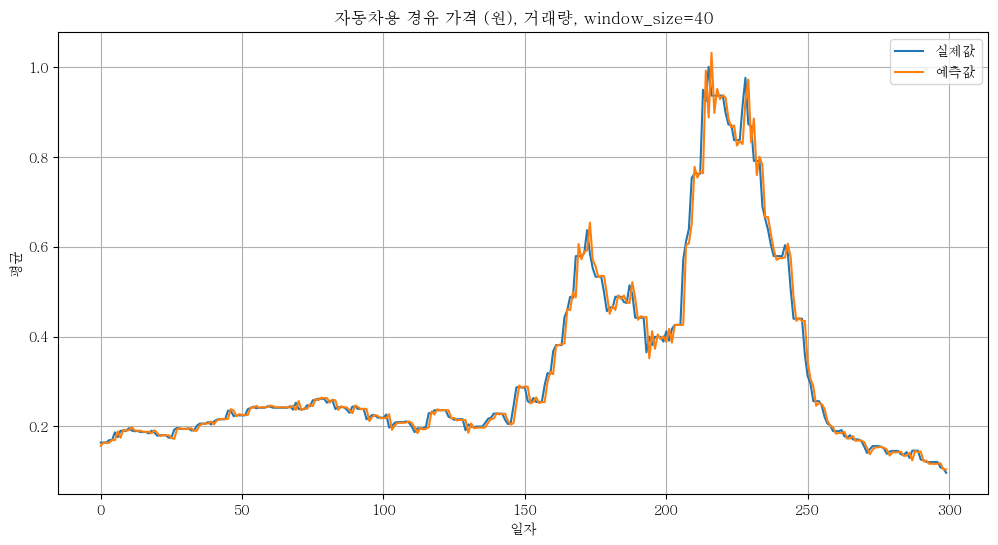

In [247]:
# # 주가 예측
# pred = model.predict(x_test) 

# plt.figure(figsize=(12, 6))
# plt.title('자동차용 경유 가격 (원), 거래량, window_size=40')
# plt.ylabel('평균')
# plt.xlabel('일자')
# plt.plot(y_test, label='실제값')
# plt.plot(pred, label='예측값')
# plt.grid()
# plt.legend(loc='best')

# plt.show()

In [248]:
# 결과값 역정규화 하기
pred_af = scaler.inverse_transform(pred)
y_test_af = scaler.inverse_transform(y_test)

ValueError: non-broadcastable output operand with shape (300,1) doesn't match the broadcast shape (300,3)